In [1]:
!pip install koreanize_matplotlib
!apt -qq -y install fonts-nanum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.1 MB/s eta 0:00:00
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

### <a href="https://klue-benchmark.com/">KLUE</a>
- 연구용 데이터 셋


In [3]:
# read_json 으로 url 불러오기
url = "https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json"

df = pd.read_json(url)
df.head()

,guid,title,predefined_news_category,label,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25
2,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,IT과학,사회,"{'annotators': ['14', '13', '10'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.15. 오후 12:00
3,ynat-v1_train_00003,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,IT과학,사회,"{'annotators': ['16', '11', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.02.28. 오전 9:54
4,ynat-v1_train_00004,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화,생활문화,"{'annotators': ['03', '02', '12'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.03. 오전 7:05


In [4]:
# 행,열 파악

df.shape

(45678, 7)

In [5]:
# 중복 데이터가 있는지 확인

df.duplicated(subset=['title'])

0        False
1        False
2        False
3        False
4        False
         ...  
45673    False
45674    False
45675    False
45676    False
45677    False
Length: 45678, dtype: bool

In [6]:
# 결측치 확인

df.isnull().sum()

guid                        0
title                       0
predefined_news_category    0
label                       0
annotations                 0
url                         0
date                        0
dtype: int64

### 텍스트 길이 분석

In [7]:
# 타이틀 길이를 구해서 새로운 컬럼(title_len) 생성

df['title_len'] = df['title'].str.len()

In [8]:
# 토큰 개수(공백 기준으로) : title_token_count

# df.head(3)

df['title_token_count'] = df['title'].str.split().str.len()

In [9]:
df.head(3)

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36,26,7
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25,23,5
2,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,IT과학,사회,"{'annotators': ['14', '13', '10'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.15. 오후 12:00,27,7


In [10]:
# 타이틀 길이와 토근 개수 컬럼만으로 기술통계 요약 정보 보기

df.describe()

,title_len,title_token_count
count,45678.000000,45678.000000
mean,27.366544,6.611213
std,4.864236,1.460011
min,4.000000,1.000000
25%,25.000000,6.000000
50%,28.000000,7.000000
75%,31.000000,8.000000
max,44.000000,13.000000


In [11]:
# 텍스트 길이가 가장 짧은 기사는?

# df[df['title_len'] == df['title_len'].min()]
df[df['title_len'] == 4]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
4343,ynat-v1_train_04343,봄 산책,생활문화,생활문화,"{'annotators': ['12', '10', '13'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.05. 오후 1:51,4,2


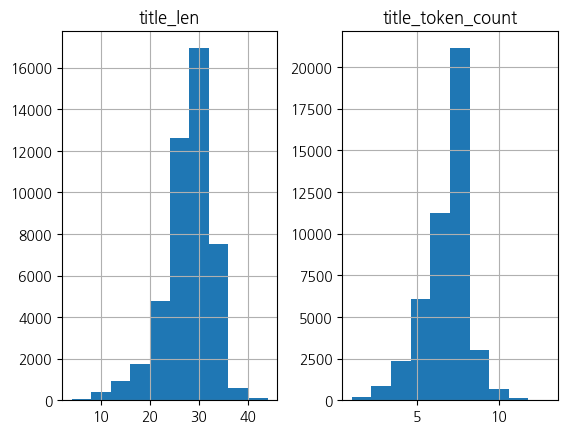

In [12]:
# 히스토그램


# df.plot.hist()

df.hist();

In [13]:
# 텍스트 길이가 가장 긴 기사는?

df[df['title_len'] == df['title_len'].max()]
# df[df['title_len'] == 44]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
5792,ynat-v1_train_05792,美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보,세계,세계,"{'annotators': ['02', '18', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.15. 오전 5:10,44,6
20168,ynat-v1_train_20168,그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위,IT과학,사회,"{'annotators': ['12', '07', '14'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.09.14. 오후 2:43,44,10
28257,ynat-v1_train_28257,주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비,생활문화,생활문화,"{'annotators': ['14', '07', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.09. 오전 11:00,44,11
30493,ynat-v1_train_30493,MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매,IT과학,IT과학,"{'annotators': ['13', '10', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.26. 오전 11:00,44,9


### 워드 클라우드 시각화
- https://github.com/amueller/word_cloud

  


In [14]:
# 시리즈 형태로 되어 있는 건  안됨

news_title = " ".join(df['title'])

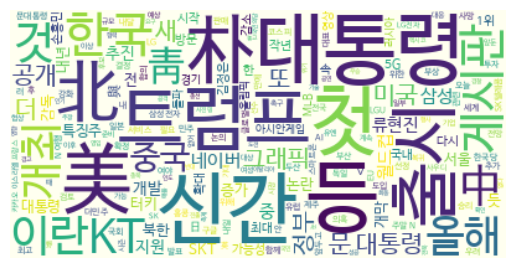

In [15]:

from wordcloud import WordCloud


font_path = r"/Library/Fonts/NanumBarunGothic.ttf"

wordcloud = WordCloud(font_path, background_color="ivory", random_state=42).generate(news_title)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

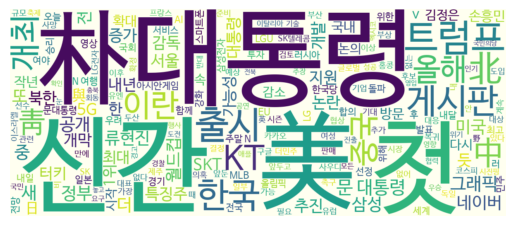

In [16]:
# 워드 클라우드 작성 함수

font_path = r"/Library/Fonts/NanumBarunGothic.ttf"
stop_words = ['하지만','그리고','그런데','저는','제가','그럼','이런','저런','합니다','많은','많이','정말','너무','수','등','것']

def display_word_cloud(data, width=1200, height=500):
  wordcloud = WordCloud(font_path,
                        background_color="ivory",
                        random_state=42,
                        width=width,
                        height=height,
                        stopwords=stop_words).generate(data)

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


display_word_cloud(news_title)

In [17]:
# 불용어 처리까지 들어간 워드 클라우드 함수

### 레이블

In [18]:
# label 확인

df['label'].unique()

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

In [19]:
# 레이블 별 개수 파악

df['label'].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

In [20]:
# 세계 기사만 가져오기

# df[df['label'] == '세계']['title']

subject_title = " ".join(df.loc[df['label'] == '세계','title'])
subject_title[:50]

'왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보 베트남 경제 고성장 지속…2'

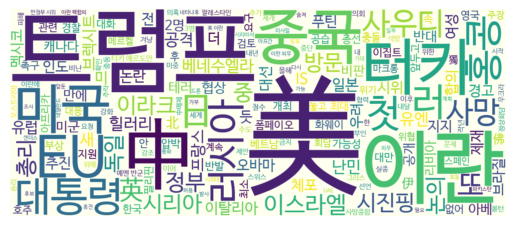

In [21]:
display_word_cloud(subject_title)

### [실습] 생활문화 레이블 가져와서 워드 클라우드 작성하기

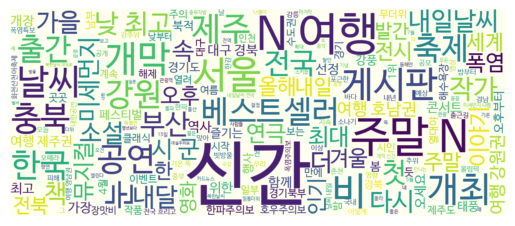

In [22]:
subject_title = " ".join(df.loc[df['label'] == '생활문화','title'])
display_word_cloud(subject_title)

### 정규식
- 숫자 제거
- 문자만 남기기

In [23]:
df['title']

0              유튜브 내달 2일까지 크리에이터 지원 공간 운영
1                 어버이날 맑다가 흐려져…남부지방 옅은 황사
2             내년부터 국가RD 평가 때 논문건수는 반영 않는다
3         김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4          회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
                       ...               
45673        사우디 아람코 주요 석유시설·유전 드론 공격에 화재
45674      박기원 감독 눈치 보지 말고…비예나 눈치 본 건 아닌데
45675    아시안게임 첫 경기 앞둔 라건아 인도네시아 팬이라도 ...
45676       트럼프 미중 무역협상 1단계 합의 서명식 가질 것종합
45677    극적 역전승 도로공사 GS칼텍스 꺾고 2년 연속 챔프...
Name: title, Length: 45678, dtype: object

In [24]:
# df['title'].str.replace("[0-9]",'',regex=True)
df['title2'] = df['title'].str.replace(r"\d",'',regex=True)

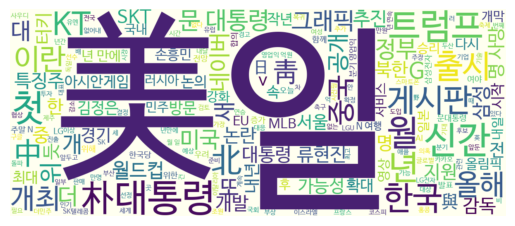

In [25]:
display_word_cloud(" ".join(df['title2']))

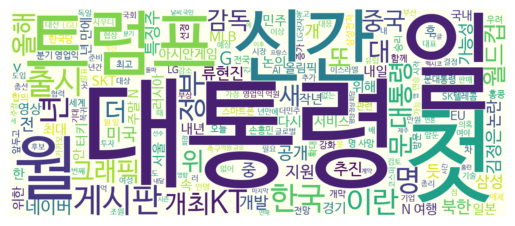

In [26]:
# 한글, 영어, 공백 남기기
# ㄱ-ㅎ ㅏ-ㅣ가-힣, a-zA-Z
# 한자 제거

# "[^ㅏ-ㅣ가-힣ㄱ-ㅎa-zA-Z]"

df['title3'] = df['title'].str.replace("[^ㅏ-ㅣ가-힣ㄱ-ㅎa-zA-Z ]", "", regex=True)
display_word_cloud(" ".join(df['title3']))

## 형태소 분석기로 특정 품사만 추출하기

### Pecab
- 일본어 형태소 분석기 Mecab 를 한국어 형태소 분석기로 작성
- https://github.com/hyunwoongko/pecab

In [27]:
!pip install pecab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 39.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 13.7 MB/s eta 0:00:00
  Created wheel for pecab: filename=pecab-1.0.8-py3-none-any.whl size=26646664 sha256=6dc951a78bc1847eee54476ee331f5ff1e2f3510b37558bf574240f5821e943e
  Stored in directory: /root/.cache/pip/wheels/5c/6f/b4/ab61b8863d7d8b1409def8ae31adcaa089fa91b8d022ec309d
Successfully built pecab


In [28]:
from pecab import PeCab

pecab = PeCab()

In [29]:
# morphs() : 텍스트 분리

pecab.morphs("아버지가방에들어가시다")
pecab.morphs("아버지가 방에 들어가시다")

['아버지', '가', '방', '에', '들어가', '시', '다']

In [30]:
# nouns() : 명사 추출

pecab.nouns("자장면을 먹을까? 짬뽕을 먹을까? 그것이 고민이로다.")

['자장면', '짬뽕', '그것', '고민']

In [31]:
# 품사 추출

pecab.pos("자장면을 먹을까? 짬뽕을 먹을까? 그것이 고민이로다.")

[('자장면', 'NNG'),
 ('을', 'JKO'),
 ('먹', 'VV'),
 ('을까', 'EF'),
 ('?', 'SF'),
 ('짬뽕', 'NNG'),
 ('을', 'JKO'),
 ('먹', 'VV'),
 ('을까', 'EF'),
 ('?', 'SF'),
 ('그것', 'NP'),
 ('이', 'JKS'),
 ('고민', 'NNG'),
 ('이', 'VCP'),
 ('로다', 'EF'),
 ('.', 'SF')]

In [32]:
pecab.nouns(df.loc[30493, 'title'])

['갤', '출고가', '만', '천', '원', '자급', '포함', '일', '예약', '판매']

In [33]:
# 사회 레이블의 타이틀 명사 추출

df_nouns = df.loc[df['label'] == '사회'].sample(2000, random_state=42).copy()
df_nouns.head()

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count,title2,title3
45317,ynat-v1_train_45317,국가인재원 나라배움터 이러닝 올해 학습서비스 시작,정치,사회,"{'annotators': ['16', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2019.02.10. 오후 12:00,27,6,국가인재원 나라배움터 이러닝 올해 학습서비스 시작,국가인재원 나라배움터 이러닝 올해 학습서비스 시작
17300,ynat-v1_train_17300,의장석 점거·몸싸움·욕설까지…동물국회 재연 아수라장 국회종합3보,정치,사회,"{'annotators': ['03', '09', '11'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2019.12.27. 오후 10:06,35,5,의장석 점거·몸싸움·욕설까지…동물국회 재연 아수라장 국회종합보,의장석 점거몸싸움욕설까지동물국회 재연 아수라장 국회종합보
20660,ynat-v1_train_20660,양제츠 자리 안내하는 정의용 실장,정치,사회,"{'annotators': ['02', '14', '12'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.03.29. 오후 4:37,18,5,양제츠 자리 안내하는 정의용 실장,양제츠 자리 안내하는 정의용 실장
6542,ynat-v1_train_06542,헌재 건강기능식품 광고 사전 심의는 사전검열…위헌,사회,사회,"{'annotators': ['13', '10', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.06.28. 오후 3:41,27,6,헌재 건강기능식품 광고 사전 심의는 사전검열…위헌,헌재 건강기능식품 광고 사전 심의는 사전검열위헌
11095,ynat-v1_train_11095,거래소 안랩 불성실 공시법인 미지정,경제,사회,"{'annotators': ['13', '18', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.11.02. 오후 6:10,19,5,거래소 안랩 불성실 공시법인 미지정,거래소 안랩 불성실 공시법인 미지정


In [34]:
# 시간 진행 상황
from tqdm import tqdm
tqdm.pandas()

df_nouns['title_nouns'] = df_nouns['title'].progress_map(lambda x:" ".join(pecab.nouns(x)))

100%|██████████| 2000/2000 [00:46<00:00, 43.47it/s]


In [35]:
df_nouns['title_nouns']

45317          국가 재원 나라 배움터 러닝 올해 학습 서비스 시작
17300    장석 점거 몸싸움 욕설 동물 국회 재연 아수라장 국회 종합 보
20660                       양제츠 자리 안내 정의 실장
6542              건강 기능 식품 광고 사전 심의 사전 검열 위
11095                  거래소 안랩 성실 공시 법인 미 지정
                        ...                
18903                  재난 방송 신속 신뢰 고위 대책 발표
35451          화웨이 제재 올해 글로벌 스마트폰 시장 역 성장 듯
29418               금감원 하반기 사 교 금융 교육 강사 연수
31782                    연임 문턱 황창규 미래 먹거리 힘
35802             김동철 최저임금 위반 시 징역형 삭제 법안 발
Name: title_nouns, Length: 2000, dtype: object

In [36]:
" ".join(df_nouns['title_nouns'])

'국가 재원 나라 배움터 러닝 올해 학습 서비스 시작 장석 점거 몸싸움 욕설 동물 국회 재연 아수라장 국회 종합 보 양제츠 자리 안내 정의 실장 건강 기능 식품 광고 사전 심의 사전 검열 위 거래소 안랩 성실 공시 법인 미 지정 일본 한국인 일본 방문 해외 관광객 중국 위 영상 전 세계 시선 한반도 취재진 천 명 등록 게시판 번호 안내 여름철 관광지 숙박 맛집 안내 게시판 오리지널 콘텐츠 제작 지원 사업 공모 온몸 한방 바이오 제천 한방 엑스포 폭발 화재 석유 제품 운반선 합동 감식 한진 해운 컨테이너 부산항 비상 종합 대구 웹툰 캠퍼스 개소 사업 기자 간담회 다행 책 방 이유 특징 세계 인터 신세계 화장품 사업 통합 이틀 신고 네이버 일부 동성애 커뮤니티 이상 애 분류 검색어 제외 보석 청구 변희재 내 석방 증거인 멸 갑 과징금 폭탄 마트 사 개선 에이 앤 티 앤 임시 주총 소집 허가 신청 제기 국토 분양 불법 전매 단속 강남 등 현장 점검 종합 보 대구 대전 전주 충북 여수 원주 사장 선임 신세계 아이 앤 씨 청소년 대상 톤 대회 개최 새해 고위 정청 일 개최 노동 개혁 선거구 등 논의 청주 내년 하반기 충북 북부 방송 송출 그랜드 백화점 마트 신촌 점 영업 정지 공시 열풍 지방 공무원 급 공채 경쟁 대 伊 정부 해경 구조 난민 하선 불허 분산 수용 합의 선거 광역 단체장 밤 시 분 윤곽 자정 승부 사법부 판결 불신 신뢰 리얼미터 언론 노조 민주 언론 수첩 제작진 카드 뉴스 년 후 한국 사과 구경 방통 위원장 인터넷 업계 상생 공론 기구 참여 문답 주거 복지 로드맵 주요 내용 종합 속도 길서 의식 운전자 암행 순찰차 구조 지방세 체납 차주 골프장 굿 샷 번호판 김해 공항 확장 與 영남 텃밭 분열 위기 묘수 한국 기자 협회 세계 기자 대회 개최 다음 창업자 네이버 응원 한국 경제 모범 대교 아동 교육 콘텐츠 사업 체결 방송 소식 아리랑 중국 광동 업무 협약 外 인턴 액티브 대 가짜 뉴스 미디어 교육 확대 김정숙 여사 사회 복지 공동 금회 명예 회장 간담 회장

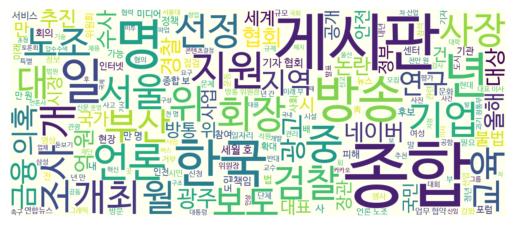

In [37]:
display_word_cloud(" ".join(df_nouns['title_nouns']))

## 워드 클라우드 마스크 처리
- https://github.com/amueller/word_cloud/blob/main/examples/masked.py

In [39]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [40]:
# 마스크 이미지 다운로드

import requests
from PIL import Image

mask_img_path = "https://raw.githubusercontent.com/amueller/word_cloud/main/examples/alice_mask.png"

# 이미지 다운로드
res = requests.get(mask_img_path)

if res.status_code == 200:
  # 파일 저장
  with open("/content/gdrive/MyDrive/Colab Notebooks/텍스트마이닝/data/alice_mask.png","wb") as file:
    file.write(res.content)